In [105]:
"""
Author: Kemil Herath
Date:
Linear Regresion Tutorial
Data Science Innovated
"""

'\nAuthor: Kemil Herath\nDate:\nLinear Regresion Tutorial\nData Science Innovated\n'

### 01. Import Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

### 02. Load the data set and explore

In [107]:
data = pd.read_csv('KC_HouseData.csv')

In [108]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,221900.0,3,1.00,1180,1.0,1955
1,538000.0,3,2.25,2570,2.0,1951
2,180000.0,2,1.00,770,1.0,1933
3,604000.0,4,3.00,1960,1.0,1965
4,510000.0,3,2.00,1680,1.0,1987


In [109]:
data.tail()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
21608,360000.0,3,2.50,1530,3.0,2009
21609,400000.0,4,2.50,2310,2.0,2014
21610,402101.0,2,0.75,1020,2.0,2009
21611,400000.0,3,2.50,1600,2.0,2004
21612,325000.0,2,0.75,1020,2.0,2008


In [110]:
data.shape

(21613, 6)

In [111]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,1971.005136
std,3.673622e+05,0.930062,0.770163,918.440897,0.539989,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,2015.000000


### 03. Some Plotting

In [112]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built'], dtype='object')

In [113]:
## Plotting using Seaborn

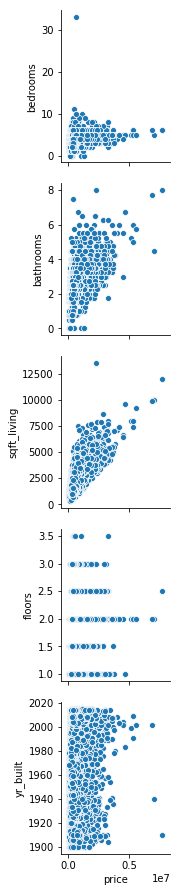

In [114]:
sns.pairplot(data,x_vars=['price'],y_vars=['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built'])


plt.show()

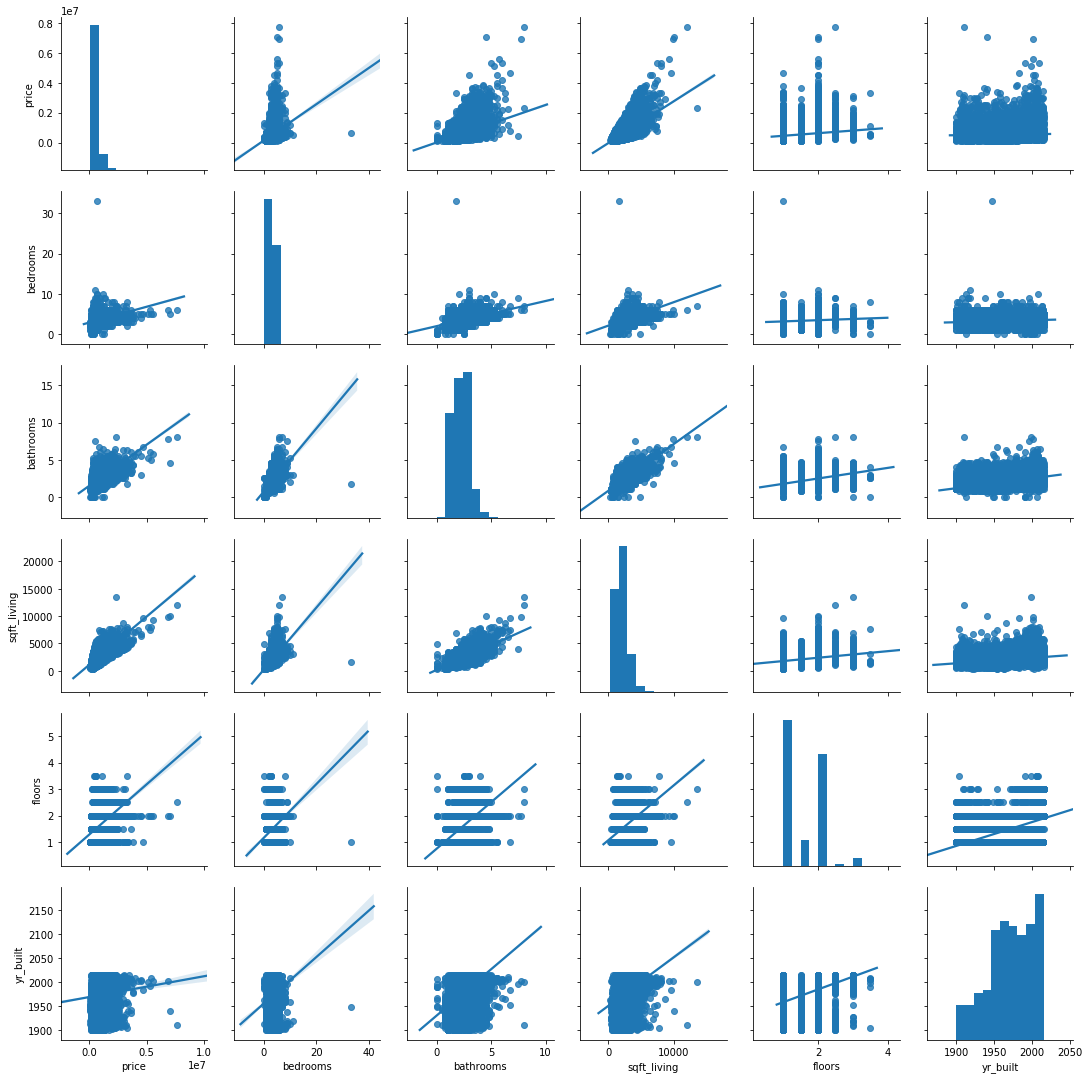

In [115]:
## Plot regression on each feature

sns.pairplot(data,kind='reg')

plt.show()

### 04. Model Creation

 - Model Ceation has 5 steps
     - Define X and y variables
     - Split the data into train and test sets
     - Instantiate the model
     - Fit the model
     - Make predictions     

In [161]:
# Step 01: Define X and y variables

X = data[['bedrooms', 'bathrooms', 'sqft_living','floors']]
y = data.price 

In [162]:
X.shape

(21613, 4)

In [163]:
y.shape

(21613,)

In [164]:
# Step 02: Split the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size = 0.8,random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size = 0.2,random_state = 0)
    # random state is 0 so that we all can get the same result

In [165]:
# Step 03: Instantiation

from sklearn.linear_model import LinearRegression

#Model 01
linreg = LinearRegression()

In [166]:
# Step 04: Fit the models
model1 = linreg.fit(X_train,y_train)

In [167]:
model2 = linreg.fit(X_train1,y_train1)

In [168]:
model3 = linreg.fit(X_train2,y_train2)

In [169]:
# step 05: Make Predictions

pred = linreg.predict(X_test)
pred1 = linreg.predict(X_test1)
pred2 = linreg.predict(X_test2)

In [170]:
print(pred)
print(pred1)
print(pred2)

[ 416246.44651307 1326264.60203291  410047.48844313 ...  654343.36997081
  804722.72152486  554234.82061526]
[ 416246.44651307 1326264.60203291  410047.48844313 ...  673346.67963074
  417381.15357526  417613.29079206]
[ 416246.44651307 1326264.60203291  410047.48844313 ...  341122.78820782
  202539.8757548   424946.95592419]


### 05. Calculate Metrics
    - In this section we will be calculating the Mean Squared Error and the R score

In [171]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,pred)
print(mse)

68739471933.15846


In [172]:
mse1 = mean_squared_error(y_test1,pred1)
print(mse1)

67535957370.197876


In [173]:
mse2 = mean_squared_error(y_test2,pred2)
print(mse2)

60042474322.672905


In [174]:
### r scores
from sklearn.metrics import r2_score

rscore = r2_score(y_test, pred)
print(rscore)

0.5226359675251483


In [175]:
rscore1 = r2_score(y_test1, pred1)
print(rscore1)

0.5084560103866683


In [176]:
rscore2 = r2_score(y_test2, pred2)
print(rscore2)

0.4958011832843411


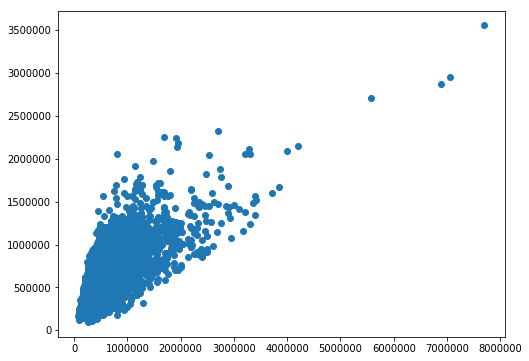

In [192]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred)

plt.show()

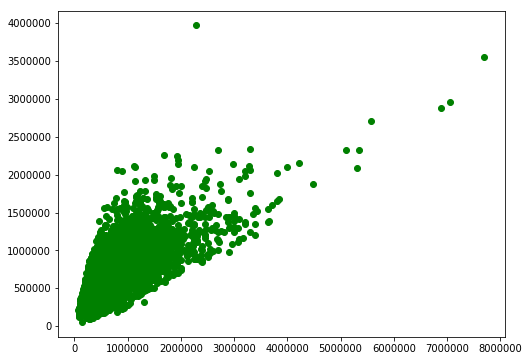

In [190]:
plt.figure(figsize=(8,6))
plt.scatter(y_test1,pred1,color = 'green')

plt.show()

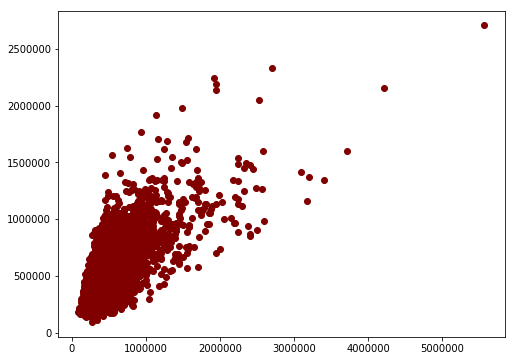

In [191]:
plt.figure(figsize=(8,6))
plt.scatter(y_test2,pred2,color = 'maroon')

plt.show()